# **Class Assignment: Inference on Fitted Values (20 points)**

#### **Meg Bucich**


---
**Instructions**: Complete the in-class assignment below.
- <font color=red>Tasks</font> indicated in red must be completed to receive credit
- Include all code for your work
- Include markdown cells with written answers explaining your work when prompted
- Your completed assignment must be submitted to Canvas as a .ipynb file by the deadline listed on Canvas
---

<br>

####<font color=red>Organized</font>
* Answers should be organized in the following format for organization and readability

<br>

```
# 1.
This will be the code block to answer the first part of a task
```

1. This will be the text answer/explanation (if prompted) for the first task

```
# 2.
This will be the code block to answer the second part of a task in a separate code cell
```

2. This will be the text answer/explanation (if prompted) for the second task

<br>

Continue this format for the remaining subtasks


<br>

---

<br>






####<font color=red>Task 1</font>

The goal of this assignment is to code all aspects of parameter inference related to fitted values for simple linear regression by hand (in R).

1. We will be working with a dataset `mtcars` already loaded into R's workspace. `mtcars` contains data on the attributes of several vehicles.  Run the following command to view the `mtcars` dataset

    `head(mtcars)`

2. We are interested in investigating the relationship between engine displace `disp` (i.e. volume of air displaced by pistons [cubic inches]) and vehicle horse power `hp`.

  * Plot a scatterplot with `hp` on the y-axis and `disp` on the x-axis. Does there appear to be a relationship between `disp` and `hp`? Explain your observations in complete sentences.

In [1]:
#1
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


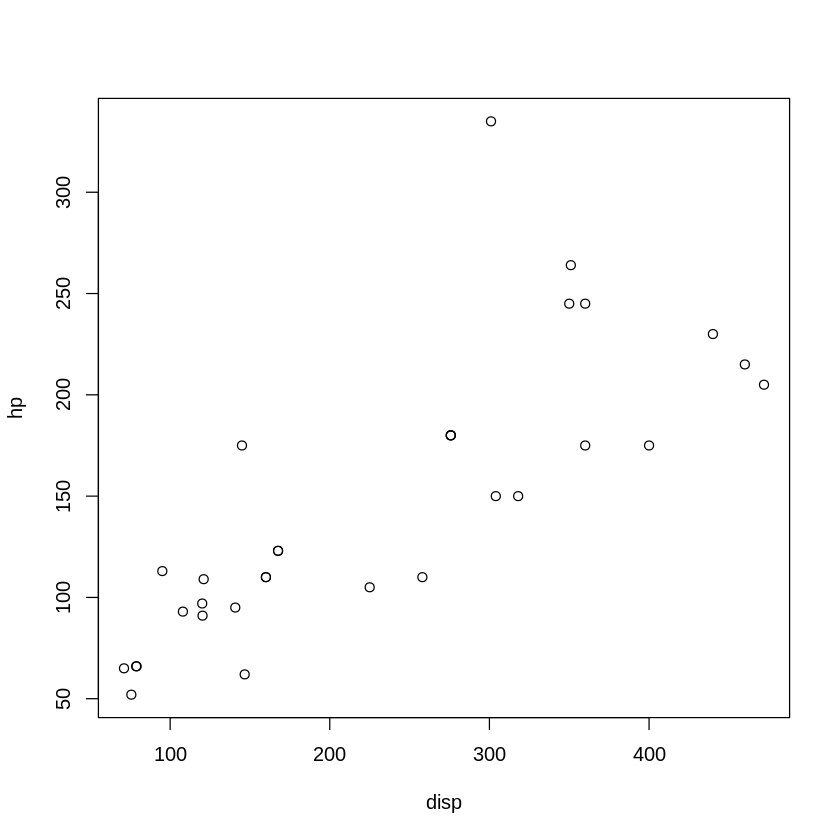

In [2]:
#2
disp = mtcars$disp # x value
hp = mtcars$hp # y value
plot(disp,hp)

Yes, there does appear to be a positive linear relationship between horsepower and volume of air displaced by pistons. Some of the data points cluster for small values of x and y, but otherwise there is a positive trend happening overall in the data.

<br>

---

<br>






####<font color=red>Task 2 - Quick Regression Analysis using Built-in Functions</font>

1. Regress `hp` (y-variable) on `disp` (x-variable) using `lm()` and store as `fit`. Show the regression `summary()`.

2. Using the `confint()` function, what is the 95% confidence interval for the slope? What is the interpretation of this 95% confidence interval?

3. Based on the regression summary, we would like to test if the slope is significantly different from zero.
  *   What are your null and alternative hypotheses?
  *   What is the p-value associated with this test?

4. Based on the regression summary, is engine displacement significantly correlated with horsepower at the 5% type I error level? Why/Why not? Justify your answer in complete sentences using your understanding.

5. What is the interpretation of the slope and your final conclusion?

In [3]:
#1
fit = lm(hp ~ disp,data = mtcars)
summary(fit)


Call:
lm(formula = hp ~ disp, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.623 -28.378  -6.558  13.588 157.562 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  45.7345    16.1289   2.836  0.00811 ** 
disp          0.4375     0.0618   7.080 7.14e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 42.65 on 30 degrees of freedom
Multiple R-squared:  0.6256,	Adjusted R-squared:  0.6131 
F-statistic: 50.13 on 1 and 30 DF,  p-value: 7.143e-08


In [4]:
#2
confint(fit)

,2.5 %,97.5 %
(Intercept),12.7948521,78.6742124
disp,0.3113399,0.5637654


There is a 95% chance that the true population slope that regresses horsepower to volume of air displaced by pistons is between (.3113399,.5637654)

In [ ]:
#3

Based on the regression summary, we would like to test if the slope is significantly different from zero.


*  What are your null/alternative hypotheses
*  What is your p value


$H_{0}: \mu = 0$\
$H_{a}: \mu \neq 0$\
p = 7.143e-08

In [ ]:
#4

Because our p-value is very small and close to zero, the engine displacement is significantly correlated with horsepower at the 5% type 1 error level.

In [ ]:
#5

Our intercept means that when engine displacement is 0, we have 45.7345 horsepower. The slope means for a unit increase in engine displacement, we get an additional .4375 horsepower.

<br>

---

<br>






####<font color=red>Task 3 - Confidence Intervals and Prediction Intervals</font>

1. Extract both the intercept and slope values from the regression from Task 2 using the code below. Confirm that you have extracted the appropriate values.
```
beta0hat <- fit$coefficients[1]
beta1hat <- fit$coefficients[2]
```

2. Extract the estimate for the residual standard error and store as `s` using the code below.
```
s <- summary(fit)$sigma
```


3. We are interested in conducting inference on horsepowers of engines with a displacement of 200 in$^3$. Use the stored coefficients to compute the fitted value at this displacement (i.e. What is $\hat{Y} | X = 200$)?
  
  Store as `yhat` [Hint: Should be $\approx 133.2$].
  
4. Calculate the 95% confidence interval for `yhat` at $X = 200$ by hand (in R). You will need $\widehat{Var(\hat{Y})}$.

  Verify your answer using the following code:
```
pred_dat <- data.frame(disp = 200)
predict(fit, newdata = pred_dat,
        level = 0.95,
        interval = 'confidence')
```

  What is the interpretation of this confidence interval?

5. Calcluate the 95% prediction interval for a new observation at $X = 200$. Verify your answer using the following code:
```
pred_dat <- data.frame(disp = 200)
predict(fit, newdata = pred_dat,
        level = 0.95,
        interval = 'predict')
```

  What is the interpretation of this prediction interval?

In [6]:
#1
beta0hat <- fit$coefficients[1]
beta1hat <- fit$coefficients[2]
beta0hat
beta1hat

(Intercept) 
   45.73453

disp 
0.4375526

In [7]:
#2
s = summary(fit)$sigma
s

[1] 42.6459

In [8]:
#3
x_h = 200
yhat = beta0hat + beta1hat*x_h
yhat

(Intercept) 
   133.2451

In [ ]:
#4

Calculate the 95% confidence interval for yhat at  X=200  by hand (in R). You will need  Var(Y)

Confidence Interval:
$\hat{y} \pm t_{(1-\frac{\alpha}{2},n-2)}se(\hat{y})$

In [26]:
n = nrow(mtcars)
var = (s**2)*((1/n)+((200-mean(disp))**2)/(sum((disp-mean(disp))**2)))
se = sqrt(var)
alpha = 0.05
degrees_freedom = nrow(mtcars) - 2
critical_value = qt(1 - alpha/2, degrees_freedom)
lower = yhat - critical_value * se
upper = yhat + critical_value * se
print(c(lower,upper))
se

(Intercept) (Intercept) 
   117.3680    149.1221 


[1] 7.774206

In [22]:
#confirm values
pred_dat <- data.frame(disp = 200)
predict(fit, newdata = pred_dat,
        level = 0.95,
        interval = 'confidence')

,fit,lwr,upr
1,133.2451,117.368,149.1221


There is a 95% chance that the true value of $E(Y_{h} \mid X_{h} = 200)$ is within (117.3680,149.1221)

In [ ]:
#5

Calcluate the 95% prediction interval for a new observation at  X=200 . Verify your answer using the following code:

Prediction Interval
$\hat{y} \pm t_{(1-\frac{\alpha}{2},n-2)} \sqrt{s^{2}(1+\frac{1}{n}+\frac{(X_{h}-\bar{X})^{2}}{\Sigma(X_{i}-\bar{X})^{2}})}$

In [24]:
n = nrow(mtcars)
var = (s**2)*(1+(1/n)+((200-mean(disp))**2)/(sum((disp-mean(disp))**2)))
se = sqrt(var)
alpha = 0.05
degrees_freedom = nrow(mtcars) - 2
critical_value = qt(1 - alpha/2, degrees_freedom)
lower = yhat - critical_value * se
upper = yhat + critical_value * se
print(c(lower,upper))

(Intercept) (Intercept) 
   44.71517   221.77495 


In [25]:
#confirm values
pred_dat <- data.frame(disp = 200)
predict(fit, newdata = pred_dat,
        level = 0.95,
        interval = 'predict')

,fit,lwr,upr
1,133.2451,44.71517,221.775


There is a 95% chance that a new observation of $X_{h}=200$ has an average value of is within (117.3680,149.1221)

<br>

---

<br>






####<font color=red>Task 4 - T-tests</font>

We are interested in conducting inference on horsepowers of engines with a displacement of 200 in$^3$. We hypothesize that the average horsepower corresponding to a displacement of 200 is significantly different than 110 hp.

1. What are your null and alternative hypotheses for this test?
  
2. Calculate the t-value for this test by hand (in R). [Answer: 2.99]

3. Calculate the p-value for this test by hand (in R). [Answer: 0.005]

4. What is your conclusion. Explain in complete sentences.

In [ ]:
#1

$H_{0}: E(Y_{h} \mid X_{h} = 200) = 110 $\
$H_{a}: E(Y_{h} \mid X_{h} = 200) \neq 110 $

In [34]:
#2
n = nrow(mtcars)
var = (s**2)*((1/n)+((200-mean(disp))**2)/(sum((disp-mean(disp))**2)))
se = sqrt(var)
t_stat = (yhat - 110)/ se
t_stat

(Intercept) 
   2.990024

In [35]:
#3
p_value = 2 * pt(abs(t_stat), degrees_freedom, lower.tail = FALSE)
print(p_value)

(Intercept) 
 0.00552684 


In [ ]:
#4

when testing to see if $E(Y_{h} \mid X_{h})$ is significantly different from 110, we got a small p-value of .0055, meaning we can reject the null, meaning yes it is significantly different from 110.

<br>

---

<br>






####<font color=red>Task 5 - Confidence Bands and Prediction Bands</font>

1. Use the following code to create confidence bands for the regression fit.
```
# Create confidence and prediction intervals
rangex    <- range(mtcars$disp)
new_disp  <- seq(rangex[1], rangex[2], 1)
newdata   <- data.frame(disp = new_disp)
yhat_conf <- predict(fit, newdata, level = 0.95, interval = 'confidence')
yhat_pred <- predict(fit, newdata, level = 0.95, interval = 'predict')
#
# plot the original scatterplot
plot(mtcars$disp, mtcars$hp,
     pch = 16,                              # plotting characters (solid dot)
     col = rgb(0, 0, 0, 0.5),               # rgb color, fourth value is transparency
     xlim = rangex, ylim = c(-10, 350),     # axis limits
     main = "Regression Fit (hp vs disp)",  # title
     xlab = "disp", ylab = "hp")            # axis labels
#
# plot regression line
lines(new_disp, yhat_conf[, "fit"])
#
# plot lower and upper bounds of confidence interval
lines(new_disp, yhat_conf[, "lwr"], lty = 2)
lines(new_disp, yhat_conf[, "upr"], lty = 2)
#
# plot lower and upper bounds of prediction interval
lines(new_disp, yhat_pred[, "lwr"], lty = 3)
lines(new_disp, yhat_pred[, "upr"], lty = 3)
#
# create legend
legend("topleft",
       c("regression line", "confidence interval", "prediction interal"),
       lty = 1:3,                           # line type
       bty = "n")                           # remove legend boundary
```

2. What is the interpretation of the confidence bands?

3. What is the interpretation of the prediction bands?

4. Which bands are wider? Explain why in complete sentences.

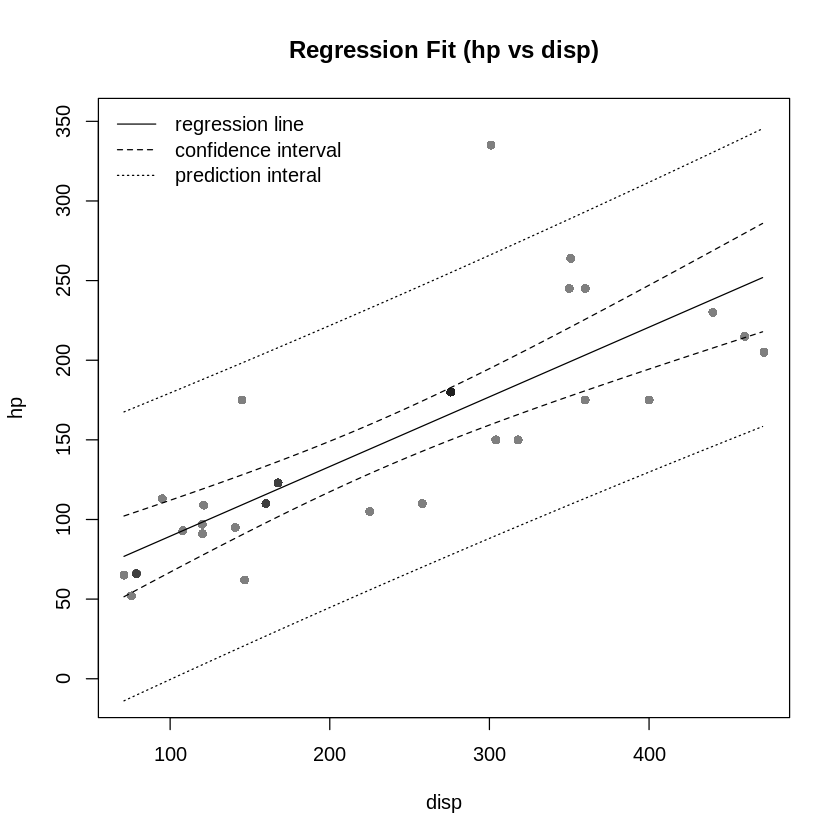

In [36]:
#1
# Create confidence and prediction intervals
rangex    <- range(mtcars$disp)
new_disp  <- seq(rangex[1], rangex[2], 1)
newdata   <- data.frame(disp = new_disp)
yhat_conf <- predict(fit, newdata, level = 0.95, interval = 'confidence')
yhat_pred <- predict(fit, newdata, level = 0.95, interval = 'predict')
#
# plot the original scatterplot
plot(mtcars$disp, mtcars$hp,
     pch = 16,                              # plotting characters (solid dot)
     col = rgb(0, 0, 0, 0.5),               # rgb color, fourth value is transparency
     xlim = rangex, ylim = c(-10, 350),     # axis limits
     main = "Regression Fit (hp vs disp)",  # title
     xlab = "disp", ylab = "hp")            # axis labels
#
# plot regression line
lines(new_disp, yhat_conf[, "fit"])
#
# plot lower and upper bounds of confidence interval
lines(new_disp, yhat_conf[, "lwr"], lty = 2)
lines(new_disp, yhat_conf[, "upr"], lty = 2)
#
# plot lower and upper bounds of prediction interval
lines(new_disp, yhat_pred[, "lwr"], lty = 3)
lines(new_disp, yhat_pred[, "upr"], lty = 3)
#
# create legend
legend("topleft",
       c("regression line", "confidence interval", "prediction interal"),
       lty = 1:3,                           # line type
       bty = "n")                           # remove legend boundary

**confidence band interpretation**\
this band gives us the range of $E(Y_{h})$ (horse power) given $X_{h}$ (displacement). This just gives us a confidence interval but for all points since intervals just show us the range for a single point. here we can see the confidence intervals acorss the entire line.

**prediction band interpretation**: \
this band gives us the range of $E(Y_{h})$ (horse power) of a new value of $X_{h}$ (displacement).

**Which is wider and why??**\
The prediction bands are always wider because it accounts for variability in the sample AND the new observation whereas the confidence band only accounts for variability in the sample. More variability = wider range.